# IMPORT LIBRARIES

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.spatial.distance import euclidean

In [42]:
import warnings
warnings.filterwarnings('ignore')

# LOAD DATASET

In [44]:
df=pd.read_csv("telcom_data.csv")
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


# Data dimension

In [40]:
print("shape of dataset ",df.shape)

shape of dataset  (150001, 55)


* Column Datatype

In [42]:
print("checking data types of columns:\n",df.dtypes)

checking data types of columns:
 Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)  

* Identifing unique value

In [7]:
for column in df.columns:
    print(f"\nUnique value in '{column}' column:")
    print(df[column].unique())


Unique value in 'Bearer Id' column:
[1.31145e+19 1.30424e+19 7.27783e+18 7.34988e+18 1.26821e+19 6.91754e+18
         nan 1.31865e+19 7.42194e+18 7.56606e+18]

Unique value in 'Start' column:
['4/4/19 12:01' '4/9/19 13:04' '4/9/19 17:42' ... '4/29/19 7:27'
 '4/29/19 7:28' nan]

Unique value in 'Start ms' column:
[770. 235.   1. ... 431.  95.  nan]

Unique value in 'End' column:
['4/25/19 14:35' '4/25/19 8:15' '4/25/19 11:58' ... '4/30/19 23:18'
 '4/30/19 22:32' nan]

Unique value in 'End ms' column:
[662. 606. 652. ...  91. 499.  nan]

Unique value in 'Dur. (ms)' column:
[1823652. 1365104. 1361762. ...   81230.   98249.      nan]

Unique value in 'IMSI' column:
[2.08201448e+14 2.08201909e+14 2.08200314e+14 ... 2.08202201e+14
 2.08201711e+14 2.08202101e+14]

Unique value in 'MSISDN/Number' column:
[3.36649622e+10 3.36818544e+10 3.37606271e+10 ... 3.36506887e+10
 3.36218901e+10 3.36196221e+10]

Unique value in 'IMEI' column:
[3.55212095e+13 3.57940090e+13 3.52815104e+13 ... 3.54831095e+

* Missing value

In [9]:
missing_value_df = df.isnull().sum()
print("\n missing value in dataset :\n",missing_value_df)


 missing value in dataset :
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
D

* Statistical summery of numeric columns

In [11]:
print(f"\n Basic statistics for key numeric columns:")
numeric_cols = ['Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)','Avg RTT DL (ms)','Avg Bearer TP DL (kbps)']
display(df[numeric_cols].describe())


 Basic statistics for key numeric columns:


,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Avg RTT DL (ms),Avg Bearer TP DL (kbps)
count,1.500000e+05,1.500000e+05,1.500000e+05,122172.000000,150000.000000
mean,1.046086e+05,4.546434e+08,4.112121e+07,109.795706,13300.045927
std,8.103762e+04,2.441429e+08,1.127639e+07,619.782739,23971.878541
min,7.142000e+03,7.114041e+06,2.866892e+06,0.000000,0.000000
25%,5.744050e+04,2.431068e+08,3.322201e+07,32.000000,43.000000
50%,8.639900e+04,4.558411e+08,4.114331e+07,45.000000,63.000000
75%,1.324302e+05,6.657055e+08,4.903424e+07,70.000000,19710.750000
max,1.859336e+06,9.029696e+08,7.833131e+07,96923.000000,378160.000000


In [79]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Identifying the top 10 handsets used by the customers

In [50]:
top_10_handsets = df['Handset Type'].value_counts().head(10)

print("Top 10 most used handsets:")
print(top_10_handsets)


Top 10 most used handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


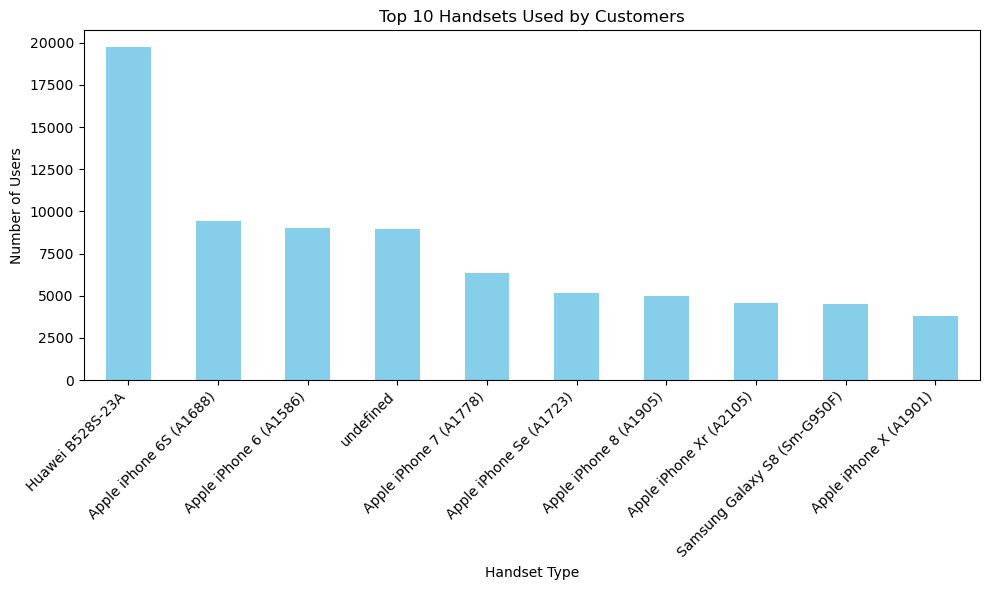

In [52]:
import matplotlib.pyplot as plt

top_10_handsets.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Top 3 Manufacturers

In [13]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


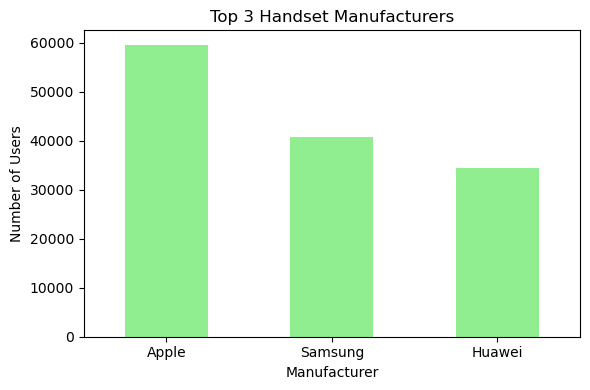

In [15]:
import matplotlib.pyplot as plt

# Plot Top 3 Manufacturers
plt.figure(figsize=(6, 4))
top_3_manufacturers.plot(kind='bar', color='lightgreen')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Top 5 handsets per top 3 manufacturers

In [17]:
# Step 1: Identify Top 3 Manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index.tolist()

# Step 2: Loop through each manufacturer and get top 5 handsets
for manufacturer in top_3_manufacturers:
    print(f"\nTop 5 Handsets for Manufacturer: {manufacturer}")
    
    top_handsets = (
        df[df['Handset Manufacturer'] == manufacturer]['Handset Type']
        .value_counts()
        .head(5)
    )
    
    print(top_handsets)



Top 5 Handsets for Manufacturer: Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Manufacturer: Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Manufacturer: Huawei
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


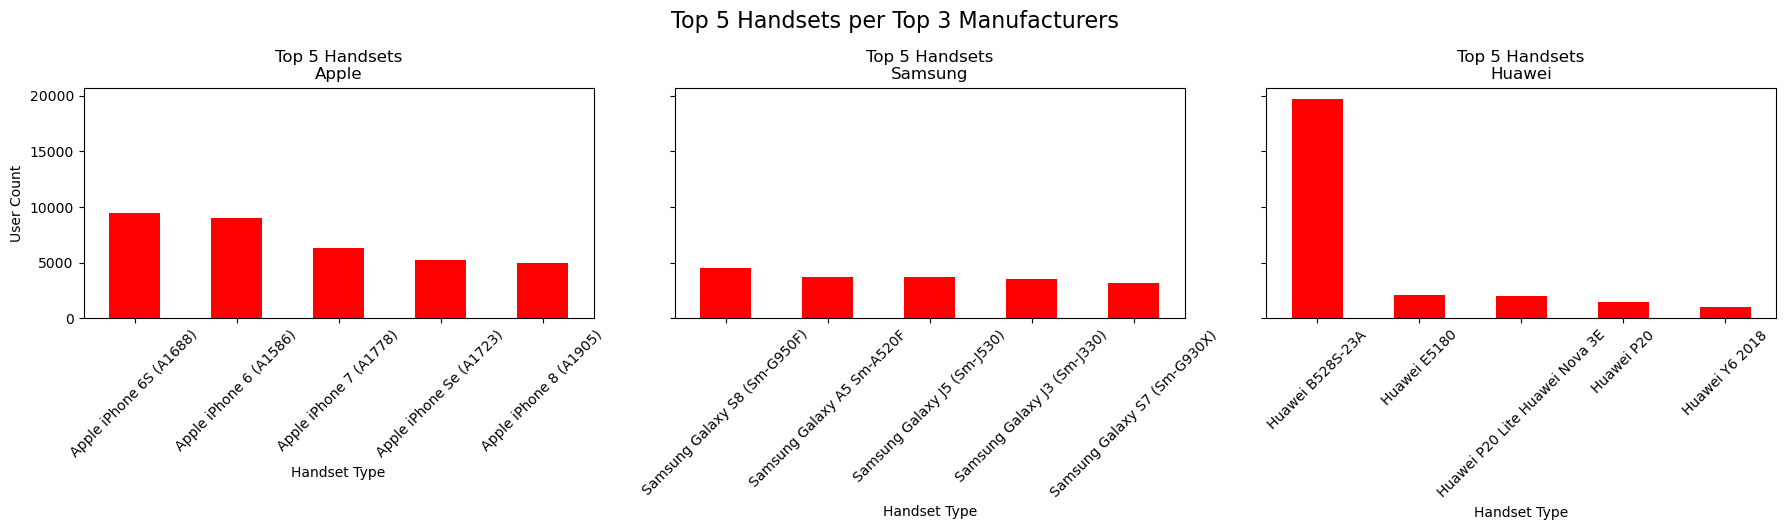

In [46]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index.tolist()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)


for i, manufacturer in enumerate(top_3_manufacturers):
    top_handsets = (
        df[df['Handset Manufacturer'] == manufacturer]['Handset Type']
        .value_counts()
        .head(5)
    )
    
    top_handsets.plot(kind='bar', ax=axes[i], color='red')
    axes[i].set_title(f'Top 5 Handsets\n{manufacturer}')
    axes[i].set_xlabel('Handset Type')
    axes[i].set_ylabel('User Count')
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.suptitle('Top 5 Handsets per Top 3 Manufacturers', fontsize=16, y=1.05)
plt.show()


# Market share of manufacturer in pie chart

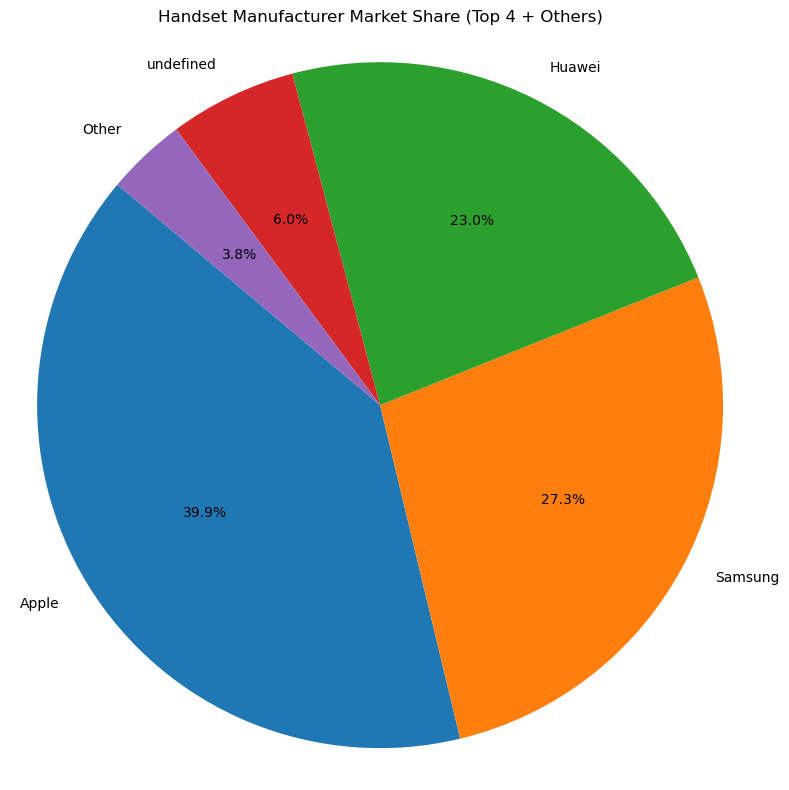

In [21]:
manufacturer_counts = df['Handset Manufacturer'].value_counts()
top_n = 4  
top_manufacturers = manufacturer_counts.head(top_n)
others_sum = manufacturer_counts[top_n:].sum()
final_counts = pd.concat([top_manufacturers, pd.Series({'Other': others_sum})])
plt.figure(figsize=(8, 8))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Handset Manufacturer Market Share (Top {top_n} + Others)')
plt.axis('equal')
plt.tight_layout()
plt.show()


# Handle Outlier

In [10]:
outlier_count = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count[col] = outliers.shape[0]

print("Outliers per column using IQR:")
for col, count in outlier_count.items():
    print(f"{col}: {count}")


Outliers per column using IQR:
Bearer Id: 0
Start ms: 0
End ms: 0
Dur. (ms): 7184
IMSI: 13250
MSISDN/Number: 24130
IMEI: 0
Avg RTT DL (ms): 14059
Avg RTT UL (ms): 11243
Avg Bearer TP DL (kbps): 13234
Avg Bearer TP UL (kbps): 21531
TCP DL Retrans. Vol (Bytes): 8952
TCP UL Retrans. Vol (Bytes): 7404
DL TP < 50 Kbps (%): 18352
50 Kbps < DL TP < 250 Kbps (%): 15220
250 Kbps < DL TP < 1 Mbps (%): 29751
DL TP > 1 Mbps (%): 37066
UL TP < 10 Kbps (%): 22123
10 Kbps < UL TP < 50 Kbps (%): 31999
50 Kbps < UL TP < 300 Kbps (%): 4543
UL TP > 300 Kbps (%): 2457
HTTP DL (Bytes): 12372
HTTP UL (Bytes): 10415
Activity Duration DL (ms): 26659
Activity Duration UL (ms): 26022
Dur. (ms).1: 7184
Nb of sec with 125000B < Vol DL: 7680
Nb of sec with 1250B < Vol UL < 6250B: 7480
Nb of sec with 31250B < Vol DL < 125000B: 6831
Nb of sec with 37500B < Vol UL: 2654
Nb of sec with 6250B < Vol DL < 31250B: 5884
Nb of sec with 6250B < Vol UL < 37500B: 5462
Nb of sec with Vol DL < 6250B: 24544
Nb of sec with Vol UL 

In [11]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Step 2: Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Replace outliers with column mean
    mean_val = df[col].mean()
    df.loc[outliers, col] = mean_val

    print(f"Outliers handled in column: {col} (Replaced with mean)")


Outliers handled in column: Bearer Id (Replaced with mean)
Outliers handled in column: Start ms (Replaced with mean)
Outliers handled in column: End ms (Replaced with mean)
Outliers handled in column: Dur. (ms) (Replaced with mean)
Outliers handled in column: IMSI (Replaced with mean)
Outliers handled in column: MSISDN/Number (Replaced with mean)
Outliers handled in column: IMEI (Replaced with mean)
Outliers handled in column: Avg RTT DL (ms) (Replaced with mean)
Outliers handled in column: Avg RTT UL (ms) (Replaced with mean)
Outliers handled in column: Avg Bearer TP DL (kbps) (Replaced with mean)
Outliers handled in column: Avg Bearer TP UL (kbps) (Replaced with mean)
Outliers handled in column: TCP DL Retrans. Vol (Bytes) (Replaced with mean)
Outliers handled in column: TCP UL Retrans. Vol (Bytes) (Replaced with mean)
Outliers handled in column: DL TP < 50 Kbps (%) (Replaced with mean)
Outliers handled in column: 50 Kbps < DL TP < 250 Kbps (%) (Replaced with mean)
Outliers handled i

# Perform aggrigate per user  (MSISDN)

In [48]:
# Rename MSISDN column for easier access (if needed)
df.rename(columns={'MSISDN/Number': 'MSISDN'}, inplace=True)

# List of per-application DL/UL columns (replace with actual names in your dataset)
app_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Create total DL/UL per app
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']:
    df[f'{app} Total (Bytes)'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']

# Total Download and Upload across all apps
df['Total DL (Bytes)'] = df[[col for col in df.columns if 'DL (Bytes)' in col]].sum(axis=1)
df['Total UL (Bytes)'] = df[[col for col in df.columns if 'UL (Bytes)' in col]].sum(axis=1)

# Total Data Volume
df['Total Data Volume (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Group by User
user_behavior = df.groupby('MSISDN').agg({
    'Bearer Id': 'count',                     # Number of xDR sessions
    'Dur. (ms)': 'sum',                       # Total session duration
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total Data Volume (Bytes)': 'sum',
    'Social Media Total (Bytes)': 'sum',
    'Google Total (Bytes)': 'sum',
    'Email Total (Bytes)': 'sum',
    'Youtube Total (Bytes)': 'sum',
    'Netflix Total (Bytes)': 'sum',
    'Gaming Total (Bytes)': 'sum',
    'Other Total (Bytes)': 'sum'
}).reset_index()

# Rename column for clarity
user_behavior.rename(columns={'Bearer Id': 'xDR Session Count', 'Dur. (ms)': 'Total Session Duration (ms)'}, inplace=True)

# View the result
user_behavior.head()


,MSISDN,xDR Session Count,Total Session Duration (ms),Total DL (Bytes),Total UL (Bytes),Total Data Volume (Bytes),Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,3.360100e+10,1,116720.0,2.062372e+09,72106216.0,2.134478e+09,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1,181230.0,5.210681e+08,72208918.0,5.932770e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,1.608406e+09,78613640.0,1.687019e+09,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,8.292431e+08,40655705.0,8.698988e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,3.689113e+09,193294872.0,3.882408e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [50]:
# Step 1: Rename MSISDN column (if necessary)
df.rename(columns={'MSISDN/Number': 'MSISDN'}, inplace=True)

# Step 2: Create total traffic columns (if not done already)
df['Total DL (Bytes)'] = df[[col for col in df.columns if 'DL (Bytes)' in col]].sum(axis=1)
df['Total UL (Bytes)'] = df[[col for col in df.columns if 'UL (Bytes)' in col]].sum(axis=1)
df['Total Data Volume (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Step 3: Compute total per-app usage if needed
apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in apps:
    dl = f'{app} DL (Bytes)'
    ul = f'{app} UL (Bytes)'
    if dl in df.columns and ul in df.columns:
        df[f'{app} Total (Bytes)'] = df[dl] + df[ul]

# Step 4: Aggregate to create `user_summary`
user_summary = df.groupby('MSISDN').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total Data Volume (Bytes)': 'sum',
    **{f'{app} Total (Bytes)': 'sum' for app in apps if f'{app} Total (Bytes)' in df.columns}
}).reset_index()

# Step 5: Rename columns
user_summary.rename(columns={
    'Bearer Id': 'xDR Session Count',
    'Dur. (ms)': 'Total Session Duration (ms)'
}, inplace=True)


In [27]:
# Total users (rows) in the aggregation summary
total_users = user_summary.shape[0]
print(f"Total users in aggregated summary: {total_users}")


Total users in aggregated summary: 106856


In [29]:
avg_sessions_per_user = user_summary['xDR Session Count'].mean()
print(f"Average sessions per user: {avg_sessions_per_user:.2f}")


Average sessions per user: 1.39


In [17]:
avg_duration_per_user = user_summary['Total Session Duration (ms)'].mean()
print(f"Average session duration per user (ms): {avg_duration_per_user:.2f}")

print(f"Average session duration per user (seconds): {avg_duration_per_user / 1000:.2f}")
print(f"Average session duration per user (minutes): {avg_duration_per_user / (1000 * 60):.2f}")


Average session duration per user (ms): 154549.86
Average session duration per user (seconds): 154.55
Average session duration per user (minutes): 2.58


In [19]:
avg_volume_per_user = user_summary['Total Data Volume (Bytes)'].mean()
print(f"Average data volume per user (Bytes): {avg_volume_per_user:.2f}")
print(f"Average data volume per user (MB): {avg_volume_per_user / (1024**2):.2f}")
print(f"Average data volume per user (GB): {avg_volume_per_user / (1024**3):.2f}")


Average data volume per user (Bytes): 3908508470.73
Average data volume per user (MB): 3727.44
Average data volume per user (GB): 3.64


# Application usage statistics

In [25]:
apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

app_stats = {}

for app in apps:
    col = f'{app} Total (Bytes)'
    if col in user_summary.columns:
        app_stats[app] = {
            'Total Usage (Bytes)': user_summary[col].sum(),
            'Average per User (Bytes)': user_summary[col].mean(),
            'Max per User (Bytes)': user_summary[col].max(),
            'Min per User (Bytes)': user_summary[col].min()
        }

app_stats_df = pd.DataFrame(app_stats).T  


app_stats_df['Total Usage (GB)'] = app_stats_df['Total Usage (Bytes)'] / (1024 ** 3)
app_stats_df['Average per User (MB)'] = app_stats_df['Average per User (Bytes)'] / (1024 ** 2)


app_stats_df = app_stats_df[['Total Usage (GB)', 'Average per User (MB)', 'Max per User (Bytes)', 'Min per User (Bytes)']]
print(" Application Usage Statistics:")
display(app_stats_df.round(2))


 Application Usage Statistics:


,Total Usage (GB),Average per User (MB),Max per User (Bytes),Min per User (Bytes)
Social Media,253.57,2.43,4.337478e+07,1563.0
Google,1082.99,10.38,1.521919e+08,40330.0
Email,313.36,3.00,4.241878e+07,18176.0
Youtube,3140.61,30.10,4.529588e+08,78903.0
Netflix,3138.61,30.08,3.995191e+08,184569.0
Gaming,59687.46,571.98,7.749432e+09,306358.0
Other,59562.04,570.78,8.167878e+09,149045.0


In [155]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Total UL (Bytes),Total DL (Bytes),Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes),Total Data Volume (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.689064e+08,3.238758e+09,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08,3.407665e+09
std,2.893170e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.024846e+07,2.307232e+09,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08,2.328708e+09
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,1.146757e+07,1.222416e+08,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,2.321606e+08
25%,7.349880e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,1.351083e+08,2.253246e+09,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08,2.418956e+09
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.673564e+08,3.160407e+09,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08,3.326323e+09
75%,1.304240e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.997669e+08,4.075472e+09,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08,4.244834e+09
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,4.698338e+09,2.214564e+11,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,2.231361e+11


# Non-Graphical Univariate Analysis 

In [27]:
dispersion = user_summary.describe().T[['std', 'min', 'max']]
dispersion['range'] = dispersion['max'] - dispersion['min']
dispersion['coefficient_of_variation'] = dispersion['std'] / user_summary.mean()
print(" Dispersion Summary:")
display(dispersion.round(2))

 Dispersion Summary:


,std,min,max,range,coefficient_of_variation
MSISDN,2.889423e+12,3.360100e+10,8.823971e+14,8.823635e+14,64.05
xDR Session Count,8.100000e-01,0.000000e+00,1.800000e+01,1.800000e+01,0.58
Total Session Duration (ms),1.863587e+05,7.142000e+03,1.855375e+07,1.854661e+07,1.27
Total DL (Bytes),1.562495e+09,5.254898e+07,7.688423e+10,7.683168e+10,0.81
Total UL (Bytes),7.616190e+07,5.733784e+06,2.645493e+09,2.639760e+09,0.65
Total Data Volume (Bytes),1.620243e+09,1.154361e+08,7.788758e+10,7.777215e+10,0.79
Social Media Total (Bytes),1.908038e+06,1.563000e+03,4.337478e+07,4.337322e+07,0.75
Google Total (Bytes),7.544861e+06,4.033000e+04,1.521919e+08,1.521515e+08,0.69
Email Total (Bytes),2.222400e+06,1.817600e+04,4.241878e+07,4.240061e+07,0.71
Youtube Total (Bytes),2.129492e+07,7.890300e+04,4.529588e+08,4.528799e+08,0.67


# Graphical Univariate Analysis

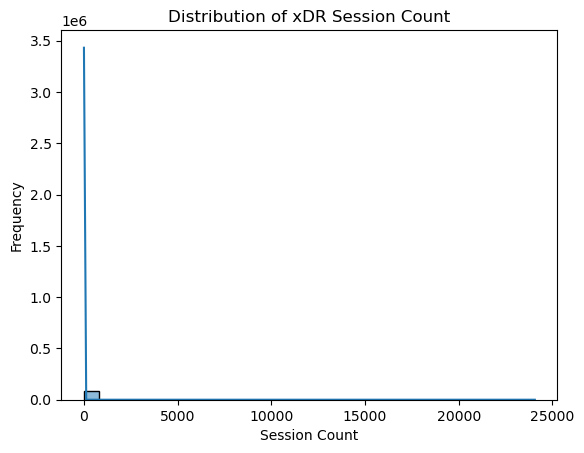

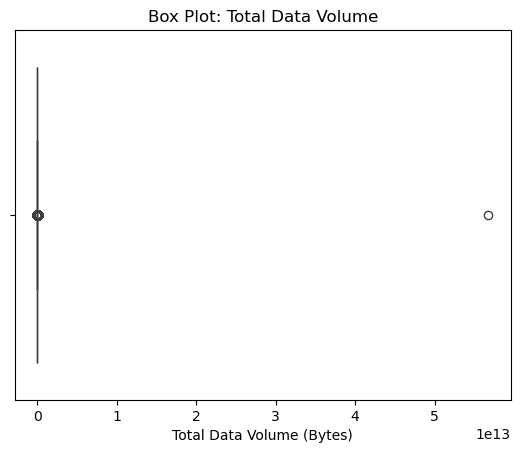

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for session count
sns.histplot(user_summary['xDR Session Count'], bins=30, kde=True)
plt.title('Distribution of xDR Session Count')
plt.xlabel('Session Count')
plt.ylabel('Frequency')
plt.show()

# Box plot for Total Data Volume
sns.boxplot(x=user_summary['Total Data Volume (Bytes)'])
plt.title('Box Plot: Total Data Volume')
plt.show()


# Bivariate Analysis: App Usage vs Total Volume

In [23]:
# Correlation between each app and total volume
apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
bivariate_corr = {}

for app in apps:
    col = f'{app} Total (Bytes)'
    if col in user_summary.columns:
        bivariate_corr[app] = user_summary[[col, 'Total Data Volume (Bytes)']].corr().iloc[0, 1]

# Show correlation values
print("Correlation with Total Volume:")
print(pd.Series(bivariate_corr).sort_values(ascending=False).round(2))


Correlation with Total Volume:
Gaming          1.0
Other           1.0
Youtube         1.0
Netflix         1.0
Google          1.0
Email           1.0
Social Media    1.0
dtype: float64


# Variable Transformation: Decile Segmentation

In [25]:
# Create decile groups based on session duration
user_summary['Duration Decile'] = pd.qcut(user_summary['Total Session Duration (ms)'], 5, labels=False)

# Total data usage per decile
decile_data = user_summary.groupby('Duration Decile')['Total Data Volume (Bytes)'].sum()
print("Total Data Volume by Duration Decile:")
print(decile_data)


Total Data Volume by Duration Decile:
Duration Decile
0    4.550527e+13
1    5.122724e+13
2    4.428044e+13
3    5.356157e+13
4    1.560187e+14
Name: Total Data Volume (Bytes), dtype: float64


# Correlation Matrix (App Usage)

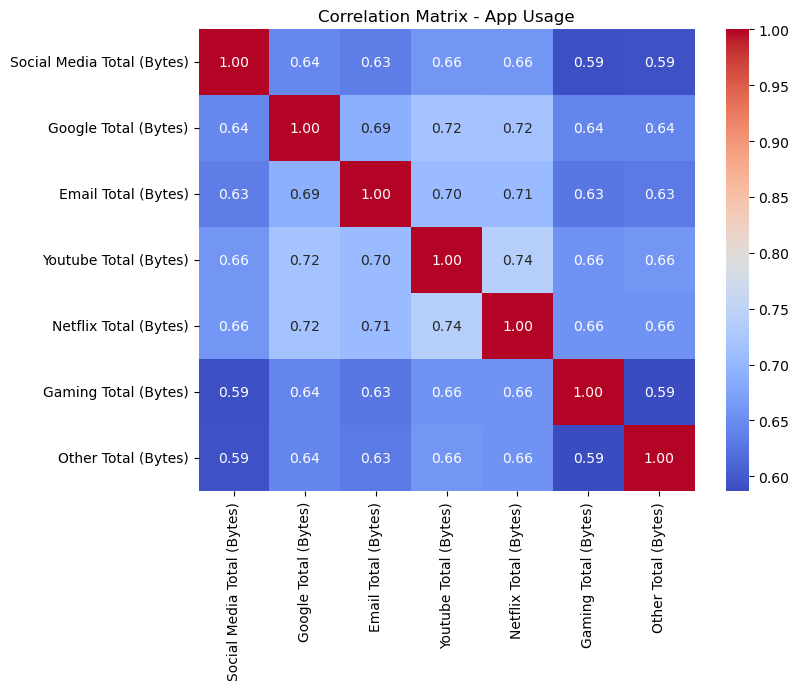

In [35]:
# Correlation matrix of app usage
app_cols = [f'{app} Total (Bytes)' for app in apps if f'{app} Total (Bytes)' in user_summary.columns]
corr_matrix = user_summary[app_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - App Usage")
plt.show()


#  User Engagement Analysis 

In [27]:
df.rename(columns={'MSISDN/Number': 'MSISDN'}, inplace=True)

# Step 2: Compute total traffic per session (row)
df['Session Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Step 3: Aggregate per user
engagement_metrics = df.groupby('MSISDN').agg({
    'Bearer Id': 'count',                      # session frequency
    'Dur. (ms)': 'sum',                        # total session duration
    'Session Total Traffic (Bytes)': 'sum'     # total data traffic
}).reset_index()

# Step 4: Rename columns for clarity
engagement_metrics.rename(columns={
    'Bearer Id': 'Session Frequency',
    'Dur. (ms)': 'Total Session Duration (ms)',
    'Session Total Traffic (Bytes)': 'Total Traffic (Bytes)'
}, inplace=True)

# View top records
print("Engagement Metrics Sample:")
display(engagement_metrics.head())


Engagement Metrics Sample:


,MSISDN,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes)
0,3.360301e+10,2,120325.0,3.481774e+09
1,3.360301e+10,1,135718.0,3.829792e+09
2,3.360301e+10,1,109906.0,1.880069e+09
3,3.360301e+10,1,135968.0,2.009479e+09
4,3.360301e+10,2,317851.0,3.873911e+09


* Aggregate and Report Top 10 Customers

In [39]:
df.rename(columns={'MSISDN/Number': 'MSISDN'}, inplace=True)

df['Session Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

engagement_metrics = df.groupby('MSISDN').agg({
    'Bearer Id': 'count',                            
    'Dur. (ms)': 'sum',                            
    'Session Total Traffic (Bytes)': 'sum'         
}).reset_index()

engagement_metrics.rename(columns={
    'Bearer Id': 'Session Frequency',
    'Dur. (ms)': 'Total Session Duration (ms)',
    'Session Total Traffic (Bytes)': 'Total Traffic (Bytes)'
}, inplace=True)

top_sessions = engagement_metrics.nlargest(10, 'Session Frequency')
top_duration = engagement_metrics.nlargest(10, 'Total Session Duration (ms)')
top_traffic = engagement_metrics.nlargest(10, 'Total Traffic (Bytes)')

print(" Top 10 Users by Session Frequency:")
display(top_sessions)

print(" Top 10 Users by Total Session Duration (ms):")
display(top_duration)

print(" Top 10 Users by Total Traffic (Bytes):")
display(top_traffic)


 Top 10 Users by Session Frequency:


,MSISDN,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes)
13526,3.362632e+10,18,8791927.0,2.396986e+10
6437,3.361489e+10,17,9966898.0,2.526295e+10
13180,3.362578e+10,17,18553754.0,2.320116e+10
37052,3.365973e+10,16,4035428.0,2.162870e+10
76363,3.367588e+10,15,4865947.0,2.255694e+10
92923,3.376054e+10,15,9279434.0,2.165574e+10
65118,3.366716e+10,13,8744914.0,1.610031e+10
666,3.360313e+10,12,6287761.0,1.618755e+10
1279,3.360452e+10,12,5207990.0,1.510837e+10
13994,3.362708e+10,12,4703516.0,1.655137e+10


 Top 10 Users by Total Session Duration (ms):


,MSISDN,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes)
13180,3.362578e+10,17,18553754.0,2.320116e+10
6437,3.361489e+10,17,9966898.0,2.526295e+10
92923,3.376054e+10,15,9279434.0,2.165574e+10
13526,3.362632e+10,18,8791927.0,2.396986e+10
65118,3.366716e+10,13,8744914.0,1.610031e+10
50281,3.366284e+10,9,6614270.0,1.420480e+10
57160,3.366469e+10,9,6288730.0,1.622697e+10
666,3.360313e+10,12,6287761.0,1.618755e+10
66029,3.366746e+10,6,5649882.0,7.978040e+09
92577,3.376041e+10,12,5321667.0,1.831098e+10


 Top 10 Users by Total Traffic (Bytes):


,MSISDN,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes)
100522,3.376389e+10,5,428573.0,7.788758e+10
98467,3.376273e+10,1,86399.0,7.463938e+10
34291,3.365912e+10,1,86399.0,6.689747e+10
100569,3.376392e+10,1,86399.0,6.672968e+10
40249,3.366048e+10,3,259198.0,5.182246e+10
32935,3.365884e+10,3,259198.0,5.097144e+10
72135,3.366946e+10,2,172799.0,4.886872e+10
48046,3.366233e+10,5,431996.0,4.873121e+10
55027,3.366407e+10,1,86399.0,4.543978e+10
37876,3.365992e+10,1,86293.0,4.529097e+10


* KMean clusture

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

features = engagement_metrics[['Session Frequency', 'Total Session Duration (ms)', 'Total Traffic (Bytes)']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
engagement_metrics['Engagement Cluster'] = kmeans.fit_predict(features_scaled)

print(" Engagement clusters assigned (sample):")
display(engagement_metrics.head())

cluster_counts = engagement_metrics['Engagement Cluster'].value_counts().sort_index()
print(" Number of users in each engagement cluster:")
print(cluster_counts)


 Engagement clusters assigned (sample):


,MSISDN,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes),Engagement Cluster
0,3.360100e+10,1,116720.0,2.134478e+09,1
1,3.360100e+10,1,181230.0,5.932770e+08,1
2,3.360100e+10,1,134969.0,1.687019e+09,1
3,3.360101e+10,1,49878.0,8.698988e+08,1
4,3.360101e+10,2,37104.0,3.882408e+09,0


 Number of users in each engagement cluster:
Engagement Cluster
0    25396
1    77904
2     3556
Name: count, dtype: int64


* Max , min, avg and total

In [43]:
cluster_stats = engagement_metrics.groupby('Engagement Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})
cluster_stats.columns = ['_'.join(col) for col in cluster_stats.columns]
cluster_stats.reset_index(inplace=True)
print(" Engagement Metrics Summary by Cluster:")
display(cluster_stats.round(2))


 Engagement Metrics Summary by Cluster:


,Engagement Cluster,Session Frequency_min,Session Frequency_max,Session Frequency_mean,Session Frequency_sum,Total Session Duration (ms)_min,Total Session Duration (ms)_max,Total Session Duration (ms)_mean,Total Session Duration (ms)_sum,Total Traffic (Bytes)_min,Total Traffic (Bytes)_max,Total Traffic (Bytes)_mean,Total Traffic (Bytes)_sum
0,0,1,4,2.16,54916,18235.0,1573420.0,209895.56,5.330508e+09,3.479327e+08,1.267294e+10,3.153178e+09,8.007811e+13
1,1,0,2,1.00,77918,7142.0,810664.0,102403.37,7.977632e+09,1.154361e+08,4.340726e+09,1.437677e+09,1.120008e+14
2,2,1,18,4.41,15672,56123.0,18553754.0,649802.53,2.310698e+09,1.718296e+09,7.788758e+10,7.412720e+09,2.635963e+13


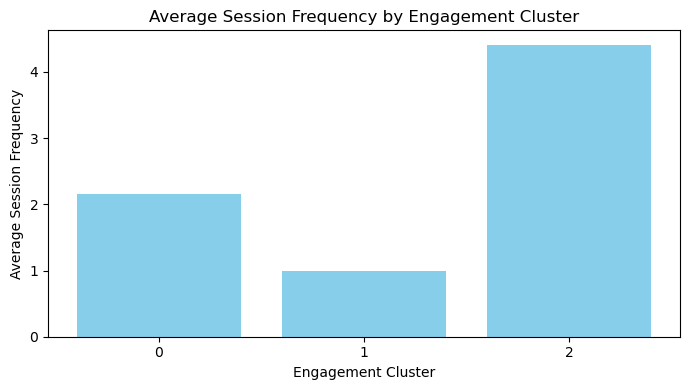

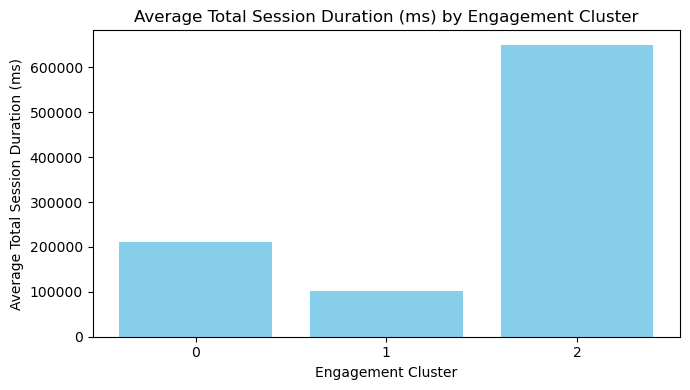

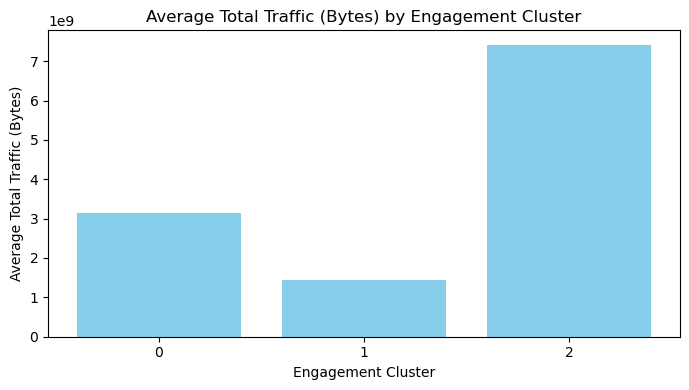

In [45]:
metrics = ['Session Frequency', 'Total Session Duration (ms)', 'Total Traffic (Bytes)']

for metric in metrics:
    plt.figure(figsize=(7, 4))
    plt.bar(cluster_stats['Engagement Cluster'], cluster_stats[f'{metric}_mean'], color='skyblue')
    plt.title(f'Average {metric} by Engagement Cluster')
    plt.xlabel('Engagement Cluster')
    plt.ylabel(f'Average {metric}')
    plt.xticks(cluster_stats['Engagement Cluster'])
    plt.tight_layout()
    plt.show()

* Top 10 Most Engaged Users Per Application

In [47]:
# Step 1: List of applications
apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Step 2: Create per-session total app usage columns if not already created
for app in apps:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    total_col = f'{app} Total (Bytes)'
    if dl_col in df.columns and ul_col in df.columns:
        df[total_col] = df[dl_col] + df[ul_col]

# Step 3: Aggregate total usage per user per app
user_app_usage = df.groupby('MSISDN')[
    [f'{app} Total (Bytes)' for app in apps if f'{app} Total (Bytes)' in df.columns]
].sum().reset_index()

top_users_per_app = {}

for app in apps:
    col = f'{app} Total (Bytes)'
    if col in user_app_usage.columns:
        top_users = user_app_usage[['MSISDN', col]].nlargest(10, col)
        top_users_per_app[app] = top_users
        
for app, top_users in top_users_per_app.items():
    print(f"\n Top 10 Most Engaged Users for {app}:")
    display(top_users)



 Top 10 Most Engaged Users for Social Media:


,MSISDN,Social Media Total (Bytes)
13526,3.362632e+10,43374779.0
92923,3.376054e+10,39783189.0
37052,3.365973e+10,35412358.0
6437,3.361489e+10,28294544.0
13180,3.362578e+10,27135500.0
65118,3.366716e+10,24247850.0
106137,3.378632e+10,23974919.0
70960,3.366907e+10,23800834.0
666,3.360313e+10,23077825.0
31331,3.365849e+10,23000066.0



 Top 10 Most Engaged Users for Google:


,MSISDN,Google Total (Bytes)
13526,3.362632e+10,152191852.0
13180,3.362578e+10,142307915.0
6437,3.361489e+10,127973787.0
92923,3.376054e+10,123223099.0
37052,3.365973e+10,116516345.0
106137,3.378632e+10,110254484.0
76363,3.367588e+10,109860502.0
65118,3.366716e+10,105032696.0
94654,3.376127e+10,97089988.0
86313,3.369876e+10,91935151.0



 Top 10 Most Engaged Users for Email:


,MSISDN,Email Total (Bytes)
13526,3.362632e+10,42418782.0
6437,3.361489e+10,40788634.0
13180,3.362578e+10,40633966.0
106137,3.378632e+10,36310123.0
37052,3.365973e+10,35999792.0
92923,3.376054e+10,33693767.0
76363,3.367588e+10,31514421.0
60087,3.366546e+10,30417885.0
65118,3.366716e+10,30335796.0
86455,3.369879e+10,29059042.0



 Top 10 Most Engaged Users for Youtube:


,MSISDN,Youtube Total (Bytes)
13180,3.362578e+10,452958769.0
92923,3.376054e+10,396289198.0
6437,3.361489e+10,394370218.0
13526,3.362632e+10,374483047.0
76363,3.367588e+10,317410572.0
65118,3.366716e+10,315231310.0
13994,3.362708e+10,308790774.0
92577,3.376041e+10,303169107.0
86455,3.369879e+10,302661958.0
666,3.360313e+10,284090139.0



 Top 10 Most Engaged Users for Netflix:


,MSISDN,Netflix Total (Bytes)
37052,3.365973e+10,399519079.0
6437,3.361489e+10,361401046.0
13180,3.362578e+10,356980607.0
92923,3.376054e+10,334643269.0
13526,3.362632e+10,328725740.0
92577,3.376041e+10,318347546.0
65118,3.366716e+10,313939488.0
76363,3.367588e+10,309093159.0
106137,3.378632e+10,305939790.0
94654,3.376127e+10,292091341.0



 Top 10 Most Engaged Users for Gaming:


,MSISDN,Gaming Total (Bytes)
6437,3.361489e+10,7.749432e+09
92923,3.376054e+10,7.461045e+09
13180,3.362578e+10,7.326673e+09
76363,3.367588e+10,6.970568e+09
13526,3.362632e+10,6.887572e+09
37052,3.365973e+10,6.725559e+09
63028,3.366646e+10,6.646303e+09
92577,3.376041e+10,6.268620e+09
57241,3.366471e+10,6.103856e+09
86455,3.369879e+10,5.753743e+09



 Top 10 Most Engaged Users for Other:


,MSISDN,Other Total (Bytes)
13526,3.362632e+10,8.167878e+09
6437,3.361489e+10,7.639264e+09
76363,3.367588e+10,6.798515e+09
13180,3.362578e+10,6.354583e+09
666,3.360313e+10,6.326671e+09
37052,3.365973e+10,6.317415e+09
13936,3.362695e+10,5.305448e+09
13994,3.362708e+10,5.117791e+09
94654,3.376127e+10,5.077779e+09
30715,3.365836e+10,5.013651e+09


* Top 3 Applications


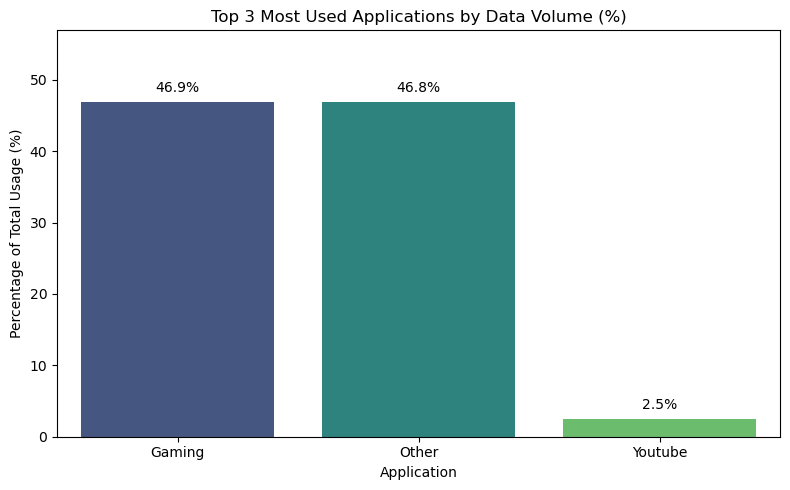

In [49]:
apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
app_totals = {}

for app in apps:
    col = f'{app} Total (Bytes)'
    if col in df.columns:
        app_totals[app] = df[col].sum()

app_totals_series = pd.Series(app_totals)
app_percentages = (app_totals_series / app_totals_series.sum()) * 100

top_3_apps_pct = app_percentages.sort_values(ascending=False).head(3)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_apps_pct.index, y=top_3_apps_pct.values, palette="viridis")
plt.title("Top 3 Most Used Applications by Data Volume (%)")
plt.ylabel("Percentage of Total Usage (%)")
plt.xlabel("Application")

for i, value in enumerate(top_3_apps_pct.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom')

plt.ylim(0, max(top_3_apps_pct.values) + 10)
plt.tight_layout()
plt.show()


* Elbow Method to Find Optimal k

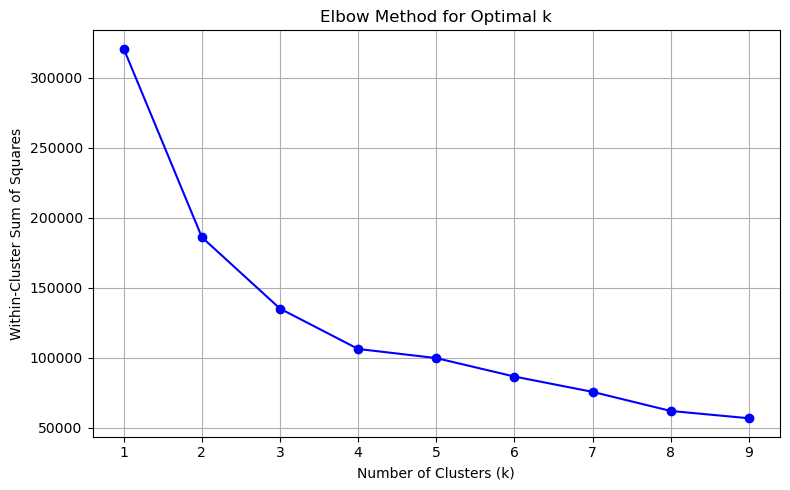

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = engagement_metrics[['Session Frequency', 'Total Session Duration (ms)', 'Total Traffic (Bytes)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()


* K-Means with Optimal k

In [255]:
optimal_k = 3 
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
engagement_metrics['Engagement Cluster'] = kmeans_final.fit_predict(X_scaled)


#  Experience Analytics 

* Aggregate Per Customer (MSISDN)

In [61]:
df.rename(columns={'MSISDN/Number': 'MSISDN'}, inplace=True)

# Step 2: Replace missing values with column means/mode
numeric_cols = [
    'TCP UL Retrans. Vol (Bytes)', 'TCP DL Retrans. Vol (Bytes)',
    'Avg RTT UL (ms)', 'Avg RTT DL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])

# Step 3: Handle outliers (optional) using z-score trimming
from scipy.stats import zscore

df[numeric_cols] = df[numeric_cols][(np.abs(zscore(df[numeric_cols])) < 3).all(axis=1)]

# Step 4: Create total/average columns per row
df['Avg TCP Retransmission'] = (df['TCP UL Retrans. Vol (Bytes)'] + df['TCP DL Retrans. Vol (Bytes)']) / 2
df['Avg RTT'] = (df['Avg RTT UL (ms)'] + df['Avg RTT DL (ms)']) / 2
df['Avg Throughput (kbps)'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

# Step 5: Aggregate per customer
network_experience = df.groupby('MSISDN').agg({
    'Avg TCP Retransmission': 'mean',
    'Avg RTT': 'mean',
    'Avg Throughput (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # mode as most used handset
}).reset_index()

print(" Network Experience Metrics Per User:")
display(network_experience.head())


 Network Experience Metrics Per User:


,MSISDN,Avg TCP Retransmission,Avg RTT,Avg Throughput (kbps),Handset Type
0,3.360100e+10,1.078479e+07,23.000000,38.00000,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,1.078479e+07,15.500000,49.50000,Apple iPhone 7 (A1778)
2,3.360100e+10,1.078479e+07,63.729294,48.50000,undefined
3,3.360101e+10,3.803623e+05,42.000000,124.00000,Apple iPhone 5S (A1457)
4,3.360101e+10,9.373852e+06,31.740774,2859.76219,Apple iPhone Se (A1723)


* Compute 10 Top, Bottom & Most Frequent Values

In [63]:
metrics = {
    'Avg TCP Retransmission': 'TCP',
    'Avg RTT': 'RTT',
    'Avg Throughput (kbps)': 'Throughput'
}

for col, label in metrics.items():
    print(f"\n Top 10 {label} Values:")
    display(network_experience[[col]].sort_values(by=col, ascending=False).head(10))
    
    print(f"\n Bottom 10 {label} Values:")
    display(network_experience[[col]].sort_values(by=col, ascending=True).head(10))
    
    print(f"\n Most Frequent {label} Values:")
    display(network_experience[col].value_counts().head(10).reset_index().rename(columns={'index': label, col: 'Count'}))



 Top 10 TCP Values:


,Avg TCP Retransmission
42131,31325801.0
99442,31154563.5
24758,31103877.0
17456,31076316.0
30063,31037321.5
25845,30928442.0
29442,30891877.5
7398,30766741.5
32715,30762076.0
31436,30638216.5



 Bottom 10 TCP Values:


,Avg TCP Retransmission
23472,48.5
6359,64.0
96977,64.5
13546,67.0
2177,71.5
25863,88.0
102198,88.0
105775,88.5
78100,89.5
89395,91.0



 Most Frequent TCP Values:


,Count,count
0,1.078479e+07,57595
1,7.962917e+06,4125
2,9.373852e+06,1643
3,1.040560e+07,361
4,9.844163e+06,286
5,1.040562e+07,154
6,3.804943e+05,136
7,7.962917e+06,94
8,1.059520e+07,83
9,3.798753e+05,74



 Top 10 RTT Values:


,Avg RTT
66760,252.0
95445,248.5
46358,248.0
86346,244.5
25725,244.0
43683,239.5
34214,238.0
35723,238.0
97877,237.5
26462,236.5



 Bottom 10 RTT Values:


,Avg RTT
44748,0.0
28878,0.0
39066,1.0
83396,2.0
36039,2.5
69662,3.0
21980,4.0
3882,4.5
74434,4.5
17863,5.0



 Most Frequent RTT Values:


,Count,count
0,63.729294,19124
1,49.481549,4125
2,14.500000,3054
3,19.500000,2394
4,15.000000,1594
5,19.000000,1583
6,20.000000,1535
7,14.000000,1501
8,24.500000,1259
9,15.500000,1178



 Top 10 Throughput Values:


,Avg Throughput (kbps)
104236,35216.5
69173,34943.0
99842,34915.0
45901,34685.5
57463,34647.5
71599,34631.0
67989,34575.0
88580,34526.0
97360,34449.5
100331,34366.5



 Bottom 10 Throughput Values:


,Avg Throughput (kbps)
29797,0.0
102039,0.0
10649,0.0
40785,0.0
91064,0.0
69656,0.0
40936,0.0
41354,0.0
16332,0.0
19648,0.0



 Most Frequent Throughput Values:


,Count,count
0,5688.02438,4219
1,7.50000,2911
2,31.50000,2192
3,48.50000,1150
4,45.00000,1117
5,49.00000,1081
6,48.00000,979
7,49.50000,978
8,44.50000,919
9,45.50000,909


*  Average TCP Retransmission per Handset Type

In [65]:
# Group by Handset Type and compute average retransmissions
retransmission_by_handset = df.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean().sort_values(ascending=False)

# Display top and bottom
print("Top 5 Handsets by TCP Retransmission:")
display(retransmission_by_handset.head())

print("\nBottom 5 Handsets by TCP Retransmission:")
display(retransmission_by_handset.tail())


Top 5 Handsets by TCP Retransmission:


Handset Type
Spa Condor Elect. Allure M1 Plus         3.176618e+07
Quartel Infotech. Maximus M84            3.087198e+07
Lg-M400Dy                                2.840971e+07
Tcl Communicatio. Pixi 4 6 3G Android    2.630641e+07
Spa Condor Elect. P8 Lite                2.591738e+07
Name: TCP DL Retrans. Vol (Bytes), dtype: float64


Bottom 5 Handsets by TCP Retransmission:


Handset Type
Zebra Technologi. Mc5574                          NaN
Zte Blade A452 Blade A452                         NaN
Zte Blade V8 Lite Blade V8 Lite Zte Blade V8 Se   NaN
Zte Mf626                                         NaN
Zyxel Communicat. Sbg3600                         NaN
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

*  Metrics for Clustering (Experience-Based)

In [67]:
experience_features = network_experience[['Avg TCP Retransmission', 'Avg RTT', 'Avg Throughput (kbps)']]

experience_features = experience_features.fillna(experience_features.mean())

scaler = StandardScaler()
experience_scaled = scaler.fit_transform(experience_features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
network_experience['Experience Cluster'] = kmeans.fit_predict(experience_scaled)

cluster_summary = network_experience.groupby('Experience Cluster').agg({
    'Avg TCP Retransmission': ['mean', 'min', 'max'],
    'Avg RTT': ['mean', 'min', 'max'],
    'Avg Throughput (kbps)': ['mean', 'min', 'max'],
    'MSISDN': 'count'
}).rename(columns={'MSISDN': 'User Count'}).reset_index()

print(" Cluster Summary:")
display(cluster_summary)


 Cluster Summary:


Experience Cluster Avg TCP Retransmission                          \
                                       mean        min          max   
0                  0           1.844990e+06       48.5  18929969.25   
1                  1           1.032582e+07  1854576.5  31325801.00   
2                  2           9.359724e+06       91.0  31154563.50   

     Avg RTT                   Avg Throughput (kbps)               User Count  
        mean        min    max                  mean  min      max      count  
0  41.021232   8.000000  236.0          12023.098043  0.5  35216.5      24362  
1  22.465482   0.000000   54.0            690.251068  0.5  32778.5      51601  
2  71.090272  44.114647  252.0           1781.887606  0.0  34145.0      30893

# Satisfaction Analysis

   * Compute Engagement Score

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
import numpy as np

# -----------------------------
# A. Engagement Score
# -----------------------------

engage_features = engagement_metrics[['Session Frequency', 'Total Session Duration (ms)', 'Total Traffic (Bytes)']].copy()

engage_scaler = StandardScaler()
engage_scaled = engage_scaler.fit_transform(engage_features)

engage_kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
engage_clusters = engage_kmeans.fit_predict(engage_scaled)
engagement_metrics['Engagement Cluster'] = engage_clusters

engage_centers = engage_kmeans.cluster_centers_
least_engaged_idx = np.argmin([center[0] for center in engage_centers])  # Session Frequency = index 0
least_engaged_center = engage_centers[least_engaged_idx]

# Step 5: Compute engagement score = distance from least engaged cluster
engagement_metrics['Engagement Score'] = [
    euclidean(row, least_engaged_center) for row in engage_scaled
]

# -----------------------------
# B. Experience Score
# -----------------------------

exp_features = network_experience[['Avg TCP Retransmission', 'Avg RTT', 'Avg Throughput (kbps)']].copy().fillna(0)

exp_scaler = StandardScaler()
exp_scaled = exp_scaler.fit_transform(exp_features)

exp_kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
exp_clusters = exp_kmeans.fit_predict(exp_scaled)
network_experience['Experience Cluster'] = exp_clusters

exp_centers = exp_kmeans.cluster_centers_
worst_exp_index = np.argmax([c[0] + c[1] - c[2] for c in exp_centers])  # retrans + rtt - throughput
worst_exp_center = exp_centers[worst_exp_index]

# Step 5: Compute experience score = distance from worst experience cluster
network_experience['Experience Score'] = [
    euclidean(row, worst_exp_center) for row in exp_scaled
]

# -----------------------------
# Final Result: Merge Scores
# -----------------------------
# Merge both scores on MSISDN for final output
user_scores = pd.merge(
    engagement_metrics[['MSISDN', 'Engagement Score']],
    network_experience[['MSISDN', 'Experience Score']],
    on='MSISDN'
)

print(" User Engagement + Experience Scores:")
display(user_scores.head(10))


 User Engagement + Experience Scores:


,MSISDN,Engagement Score,Experience Score
0,3.360301e+10,0.013436,1.283018
1,3.360301e+10,0.009314,0.505299
2,3.360301e+10,0.003917,2.007382
3,3.360301e+10,0.006310,1.927974
4,3.360301e+10,0.032875,1.610590
5,3.360302e+10,0.010661,3.083761
6,3.360302e+10,0.009968,2.041932
7,3.360302e+10,0.007107,1.911514
8,3.360302e+10,0.005589,2.386290
9,3.360302e+10,0.016685,0.505299


* Top 10 Satisfy user

In [71]:
# Step 1: Compute Satisfaction Score
user_scores['Satisfaction Score'] = (user_scores['Engagement Score'] + user_scores['Experience Score']) / 2

# Step 2: Sort by Satisfaction Score (descending) and get top 10 users
top_satisfied_users = user_scores.sort_values(by='Satisfaction Score', ascending=False).head(10)

print(" Top 10 Most Satisfied Users:")
display(top_satisfied_users)


 Top 10 Most Satisfied Users:


,MSISDN,Engagement Score,Experience Score,Satisfaction Score
78494,3.368136e+10,0.013468,7.195472,3.604470
18193,3.363772e+10,0.007639,6.933026,3.470332
31804,3.365873e+10,0.042029,6.845790,3.443909
86689,3.369904e+10,0.017791,6.796005,3.406898
61129,3.366604e+10,0.006527,6.786359,3.396443
22914,3.365014e+10,0.019472,6.546000,3.282736
73414,3.367137e+10,0.007867,6.388420,3.198143
65353,3.366743e+10,0.006170,6.379903,3.193037
25979,3.365085e+10,0.002821,6.370341,3.186581
46215,3.366204e+10,0.009802,6.339262,3.174532


* linear rtegression

In [73]:
combined_df = pd.merge(
    engagement_metrics[['MSISDN', 'Session Frequency', 'Total Session Duration (ms)', 'Total Traffic (Bytes)']],
    network_experience[['MSISDN', 'Avg RTT', 'Avg TCP Retransmission', 'Avg Throughput (kbps)', 'Handset Type']],
    on='MSISDN'
)
combined_df = pd.merge(combined_df, user_scores[['MSISDN', 'Satisfaction Score']], on='MSISDN')

combined_df.fillna({
    'Session Frequency': combined_df['Session Frequency'].mean(),
    'Total Session Duration (ms)': combined_df['Total Session Duration (ms)'].mean(),
    'Total Traffic (Bytes)': combined_df['Total Traffic (Bytes)'].mean(),
    'Avg RTT': combined_df['Avg RTT'].mean(),
    'Avg TCP Retransmission': combined_df['Avg TCP Retransmission'].mean(),
    'Avg Throughput (kbps)': combined_df['Avg Throughput (kbps)'].mean(),
}, inplace=True)

combined_df['Handset Type'].fillna(combined_df['Handset Type'].mode()[0], inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_df['Handset Type Encoded'] = le.fit_transform(combined_df['Handset Type'])

# Step 5: Features and Target
features = [
    'Session Frequency',
    'Total Session Duration (ms)',
    'Total Traffic (Bytes)',
    'Avg RTT',
    'Avg TCP Retransmission',
    'Avg Throughput (kbps)',
    'Handset Type Encoded'
]
X = combined_df[features]
y = combined_df['Satisfaction Score']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Regression Model Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")


Regression Model Evaluation:
R² Score: 0.579
MAE: 0.25
RMSE: 0.33


*  k-means (k=2) on the engagement & the experience score

In [75]:
from sklearn.cluster import KMeans
import pandas as pd

X_score = user_scores[['Engagement Score', 'Experience Score']]

# Step 2: Run KMeans clustering with k=2
kmeans_score = KMeans(n_clusters=2, random_state=42, n_init='auto')
user_scores['Satisfaction Cluster'] = kmeans_score.fit_predict(X_score)

print(" Sample Cluster Assignments:")
print(user_scores[['MSISDN', 'Engagement Score', 'Experience Score', 'Satisfaction Cluster']].head(10))

print("\n Cluster Summary (User Count per Cluster):")
print(user_scores['Satisfaction Cluster'].value_counts().sort_index())


 Sample Cluster Assignments:
         MSISDN  Engagement Score  Experience Score  Satisfaction Cluster
0  3.360301e+10          0.013436          1.283018                     0
1  3.360301e+10          0.009314          0.505299                     0
2  3.360301e+10          0.003917          2.007382                     0
3  3.360301e+10          0.006310          1.927974                     0
4  3.360301e+10          0.032875          1.610590                     0
5  3.360302e+10          0.010661          3.083761                     1
6  3.360302e+10          0.009968          2.041932                     0
7  3.360302e+10          0.007107          1.911514                     0
8  3.360302e+10          0.005589          2.386290                     1
9  3.360302e+10          0.016685          0.505299                     0

 Cluster Summary (User Count per Cluster):
Satisfaction Cluster
0    65341
1    24358
Name: count, dtype: int64


*  Aggregate the average satisfaction & experience score per cluster.  


In [68]:
if 'Satisfaction Cluster' not in user_scores.columns:
    raise ValueError("Please run k-means clustering first before aggregating scores.")

cluster_summary = user_scores.groupby('Satisfaction Cluster').agg({
    'Engagement Score': 'mean',
    'Experience Score': 'mean',
    'Satisfaction Score': 'mean',
    'MSISDN': 'count'
}).rename(columns={'MSISDN': 'User Count'}).reset_index()

print(" Average Scores per Satisfaction Cluster:")
display(cluster_summary)


 Average Scores per Satisfaction Cluster:


,Satisfaction Cluster,Engagement Score,Experience Score,Satisfaction Score,User Count
0,0,0.720329,5.883804,3.302066,98958
1,1,4.946979,5.947616,5.447298,7898


In [77]:
pip install pyodbc sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [79]:
from sqlalchemy import create_engine 

#difine sql server connection details
server = 'DESKTOP-5JLJFIO\SQLEXPRESS'
database = 'master'

#create a connection string with trusted connection
connection_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

#create ana engine
engine = create_engine(connection_url)

#transfer data to SQL server
table_name = 'telcom_data'
df.to_sql(table_name, engine, if_exists='replace', index=False)

#confirm completion
print(f"Dataset transfered to SQL Server table: {table_name}")

#Dispose the engine
engine.dispose()

Dataset transfered to SQL Server table: telcom_data
